In [91]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('/content/E-commerce Dataset.csv')

In [93]:
df.head(10)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,02-01-2018,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,24-07-2018,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,08-11-2018,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,18-04-2018,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,13-08-2018,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
5,09-07-2018,21:57:05,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card
6,16-05-2018,13:10:30,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card
7,23-06-2018,18:29:09,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card
8,29-07-2018,11:55:02,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card
9,16-05-2018,19:41:10,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order


In [94]:
df.shape

(29521, 16)

In [95]:
#checking missing values
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         3
Payment_method         1
dtype: int64

In [96]:
#dropping rows with missing values for time-series completeness
ecom = df.dropna()

In [97]:
#checking for duplicates in data
duplicate_rows = ecom.duplicated()
print(duplicate_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
29515    False
29516    False
29517    False
29518    False
29519    False
Length: 29512, dtype: bool


In [98]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29512 entries, 0 to 29519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           29512 non-null  object 
 1   Time                 29512 non-null  object 
 2   Aging                29512 non-null  float64
 3   Customer_Id          29512 non-null  int64  
 4   Gender               29512 non-null  object 
 5   Device_Type          29512 non-null  object 
 6   Customer_Login_type  29512 non-null  object 
 7   Product_Category     29512 non-null  object 
 8   Product              29512 non-null  object 
 9   Sales                29512 non-null  float64
 10  Quantity             29512 non-null  float64
 11  Discount             29512 non-null  float64
 12  Profit               29512 non-null  float64
 13  Shipping_Cost        29512 non-null  float64
 14  Order_Priority       29512 non-null  object 
 15  Payment_method       29512 non-null 

In [99]:
ecom.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,29512.000000,29512.000000,29512.000000,29512.000000,29512.000000,29512.00000,29512.000000
mean,5.084694,41958.280530,155.884420,2.385640,0.311236,72.02006,7.202762
std,3.021147,21479.136778,65.749136,1.557022,0.134189,49.54352,4.953682
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.50000,0.100000
25%,2.000000,24839.250000,109.000000,1.000000,0.200000,25.30000,2.500000
50%,5.000000,39611.500000,149.000000,2.000000,0.300000,62.00000,6.200000
75%,8.000000,54331.250000,218.000000,4.000000,0.400000,120.60000,12.100000
max,10.500000,99974.000000,250.000000,5.000000,0.500000,167.50000,16.800000


In [100]:
gender_segmentation = ecom.groupby('Gender')['Customer_Id'].count()
gender_segmentation

Gender
Female     9938
Male      19574
Name: Customer_Id, dtype: int64

In [101]:
# Convert the date column to datetime
ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])
# Group by 'Gender' and the date column, and calculate the sum of 'Sales' for each group
time_series_data = ecom.groupby(['Gender', 'Order_Date'])['Sales'].sum().reset_index()

<ipython-input-101-7989cf4d5920>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])
<ipython-input-101-7989cf4d5920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])


In [102]:
ecom.head(100)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-02-01,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-08-11,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2018-05-10,09:10:34,8.0,56399,Male,Web,Member,Auto & Accessories,Car Seat Covers,114.0,1.0,0.3,20.3,2.0,High,credit_card
98,2018-11-26,11:04:26,5.0,27009,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,1.0,0.2,141.8,14.2,Critical,credit_card
99,2018-05-17,08:36:11,2.0,35336,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.1,58.6,5.9,Critical,credit_card
100,2018-07-30,22:41:44,6.0,26503,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.3,99.4,9.9,Critical,money_order


In [103]:
# Create time series plots by gender
genders = time_series_data['Gender'].unique()

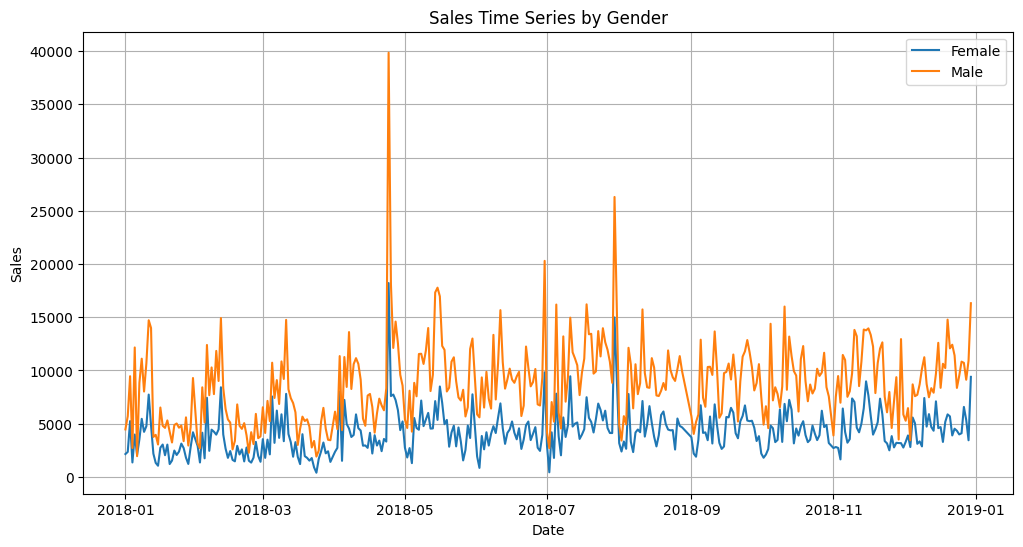

In [104]:
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Sales'], label=gender)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
purchasing_behavior = ecom.groupby('Gender')['Sales'].mean()
print(purchasing_behavior)

Gender
Female    149.349769
Male      159.202156
Name: Sales, dtype: float64


In [106]:
purchasing_behavior_profit = ecom.groupby('Gender')['Profit'].mean()
print(purchasing_behavior_profit)

Gender
Female    68.088388
Male      74.016226
Name: Profit, dtype: float64


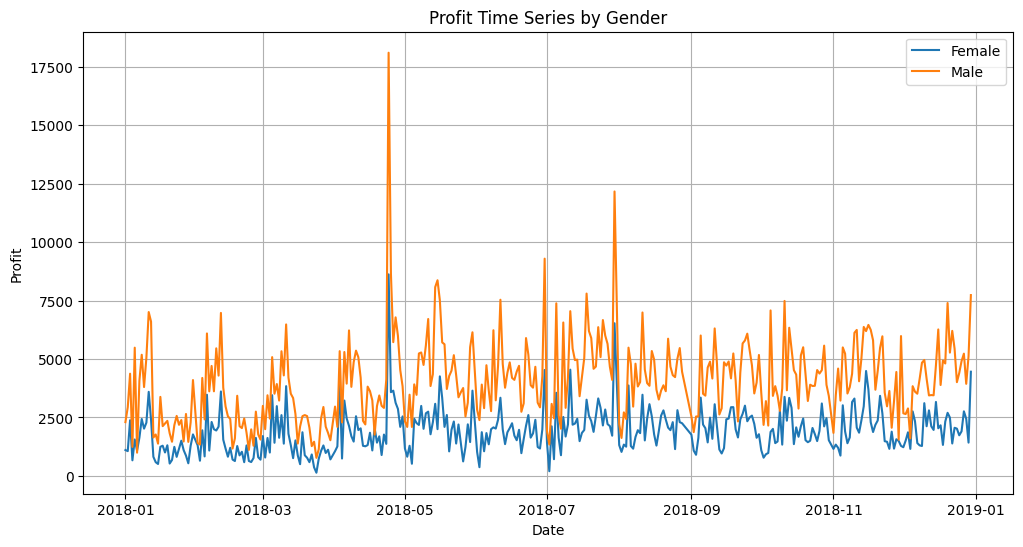

In [107]:
# Group by 'Gender' and the date column, and calculate the sum of 'Profit' for each group
time_series_data_profit = ecom.groupby(['Gender', 'Order_Date'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_profit[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Profit'], label=gender)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
purchasing_behavior_quantity = ecom.groupby('Gender')['Quantity'].mean()
print(purchasing_behavior_quantity)

Gender
Female    2.453713
Male      2.351078
Name: Quantity, dtype: float64


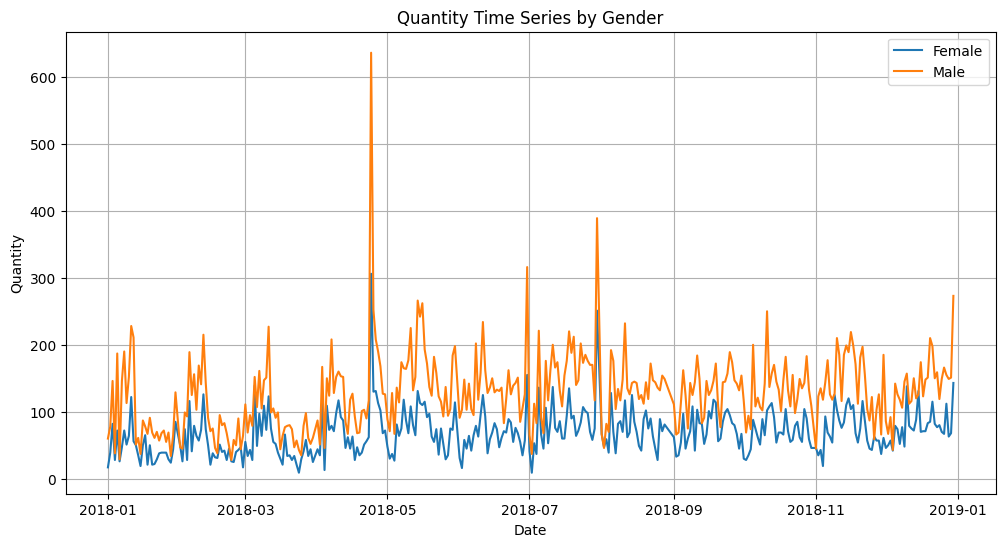

In [109]:
# Group by 'Gender' and the date column, and calculate the sum of 'Quantity' for each group
time_series_data_qty = ecom.groupby(['Gender', 'Order_Date'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_qty[time_series_data_qty['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Quantity'], label=gender)

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()


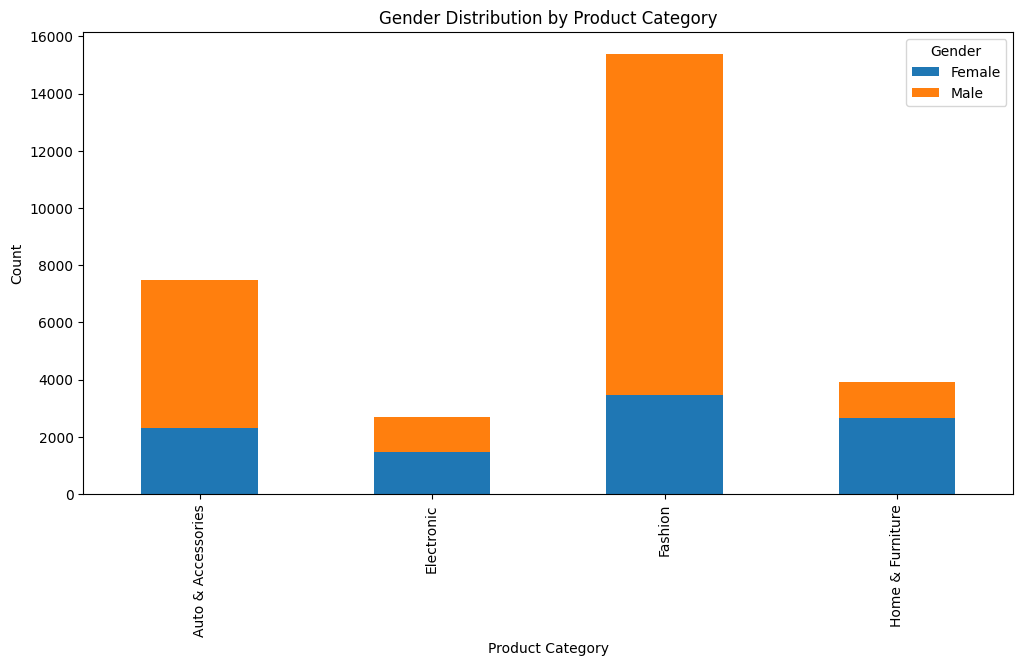

In [110]:
gender_category_counts = ecom.groupby(['Product_Category', 'Gender']).size().unstack()

# Create a bar plot
gender_category_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Gender Distribution by Product Category')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# Show the plot
plt.show()


In [111]:
purchasing_behavior = ecom.groupby('Device_Type')['Sales'].mean()
print(purchasing_behavior)

Device_Type
Mobile    162.684977
Web       155.355416
Name: Sales, dtype: float64


In [136]:
# Convert the date column to datetime
ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])

# Group by 'Device' and the date column, and calculate the sum of 'Sales' for each group
time_series_data = ecom.groupby(['Device_Type', 'Order_Date'])['Sales'].sum().reset_index()

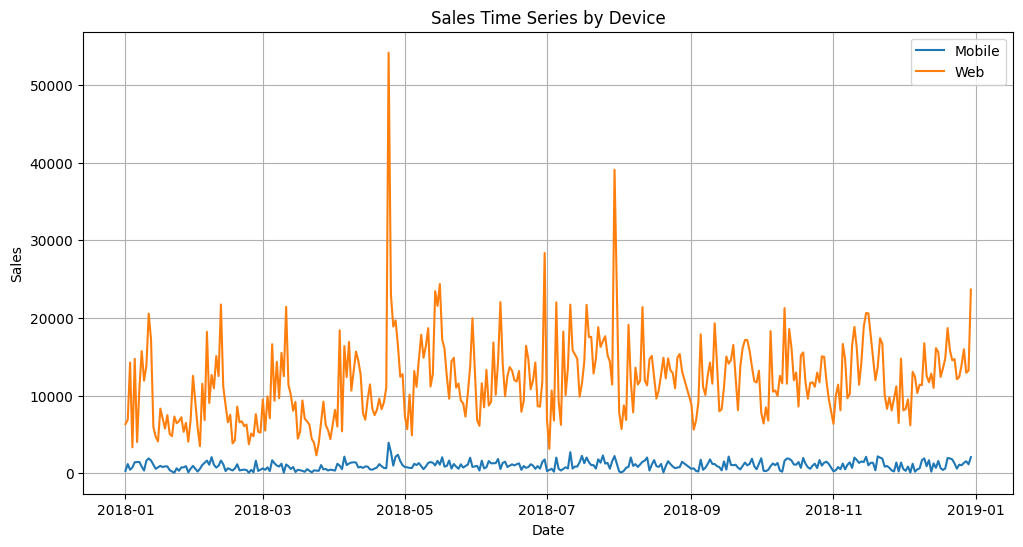

In [113]:
# Create time series plots by Device
devices = time_series_data['Device_Type'].unique()
plt.figure(figsize=(12, 6))
for device in devices:
    device_data = time_series_data[time_series_data['Device_Type'] == device]
    plt.plot(device_data['Order_Date'], device_data['Sales'], label=device)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series by Device')
plt.legend()
plt.grid(True)
plt.show()

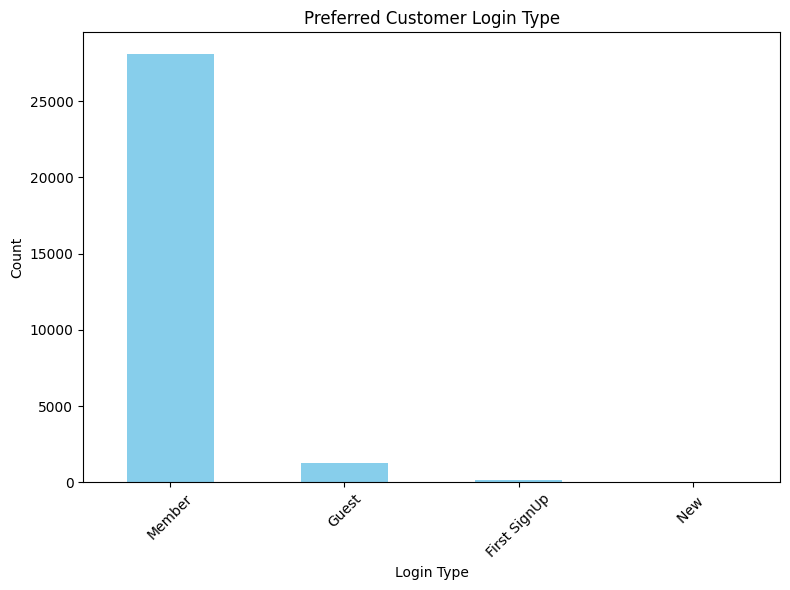

In [114]:
# Group the data by 'Customer_Login_Type' and count the occurrences of each type
login_type_counts = ecom['Customer_Login_type'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
login_type_counts.plot(kind='bar', color='skyblue')
plt.title('Preferred Customer Login Type')
plt.xlabel('Login Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the graph
plt.show()

<ipython-input-115-2180068a1ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])
<ipython-input-115-2180068a1ab5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Month'] = ecom['Order_Date'].dt.month
<ipython-input-115-2180068a1ab5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

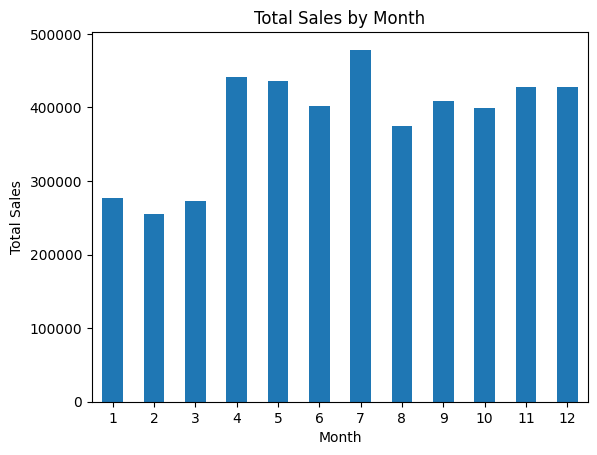

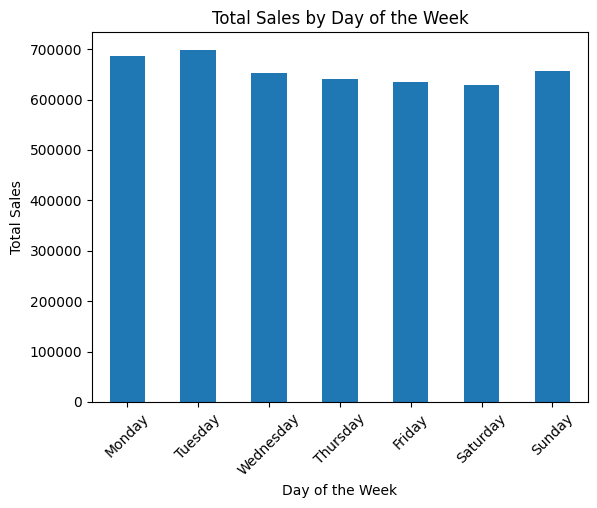

In [115]:
# Convert the 'Order_Date' column to a datetime object
ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])

# Extract month, day of the week, and hour information from the 'Order_Date' column
ecom['Month'] = ecom['Order_Date'].dt.month
ecom['Day_of_Week'] = ecom['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6


# Total sales by month
monthly_sales = ecom.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Sales', title='Total Sales by Month')
plt.xticks(rotation=0)
plt.show()

# Total sales by day of the week
day_of_week_sales = ecom.groupby('Day_of_Week')['Sales'].sum()
day_of_week_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_sales.plot(kind='bar', xlabel='Day of the Week', ylabel='Total Sales', title='Total Sales by Day of the Week')
plt.xticks(rotation=45)
plt.show()

Total Sales: $4600461.00
Total Profit: $2125456.00


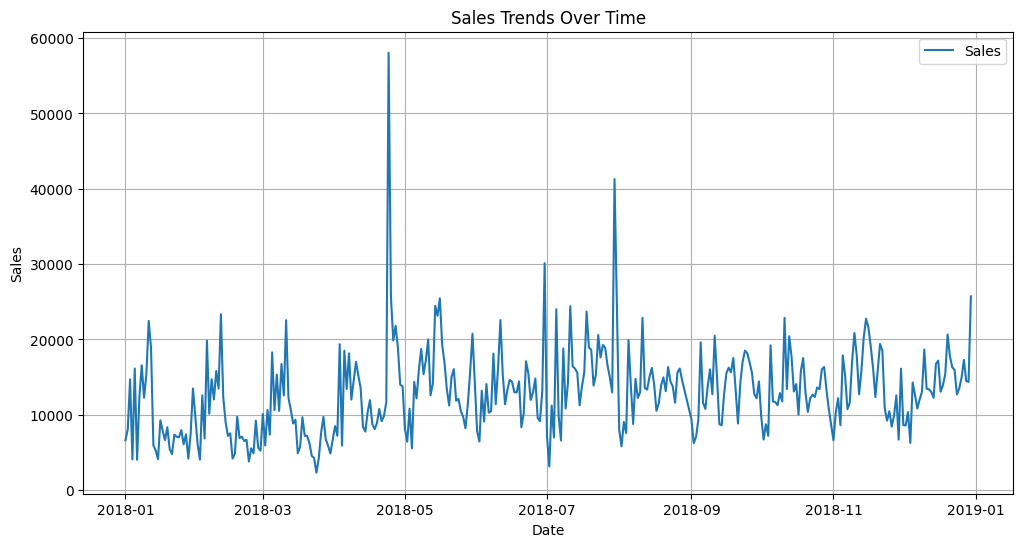


Top Selling Products:
Product
T - Shirts                346704.0
Titak watch               318972.0
Running Shoes             313376.0
Jeans                     304982.0
Formal Shoes              297987.0
Shirts                    274204.0
Tyre                      222500.0
Fossil Watch              222282.0
Car Pillow & Neck Rest    191268.0
Car Speakers              174075.0
Name: Sales, dtype: float64

Top Selling Product Categories:
Product_Category
Fashion               2607329.0
Auto & Accessories    1095681.0
Home & Furniture       502713.0
Electronic             394738.0
Name: Sales, dtype: float64


In [116]:
# Calculate total sales and profit
total_sales = ecom['Sales'].sum()
total_profit = ecom['Profit'].sum()

print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Profit: ${total_profit:.2f}')

# Convert the 'Order_Date' column to datetime
df['Order_Date'] = pd.to_datetime(ecom['Order_Date'])

# Analyze sales trends over time
sales_over_time = ecom.groupby('Order_Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()
# Identify the top-selling products and product categories
top_products = ecom.groupby('Product')['Sales'].sum().nlargest(10)
top_categories = ecom.groupby('Product_Category')['Sales'].sum().nlargest(5)

print('\nTop Selling Products:')
print(top_products)

print('\nTop Selling Product Categories:')
print(top_categories)

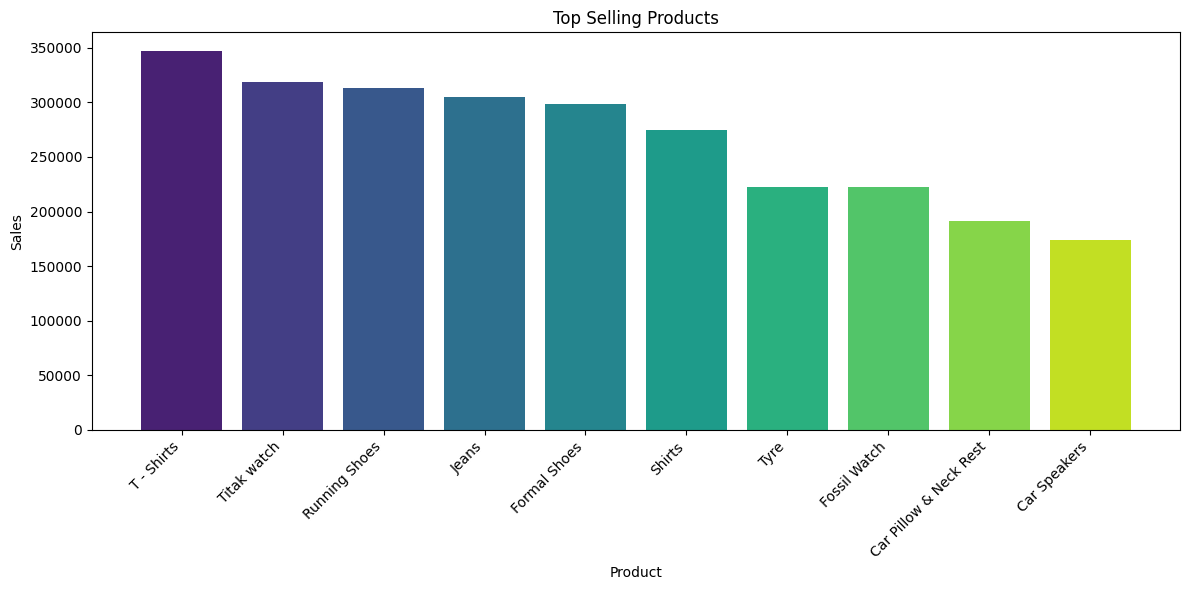

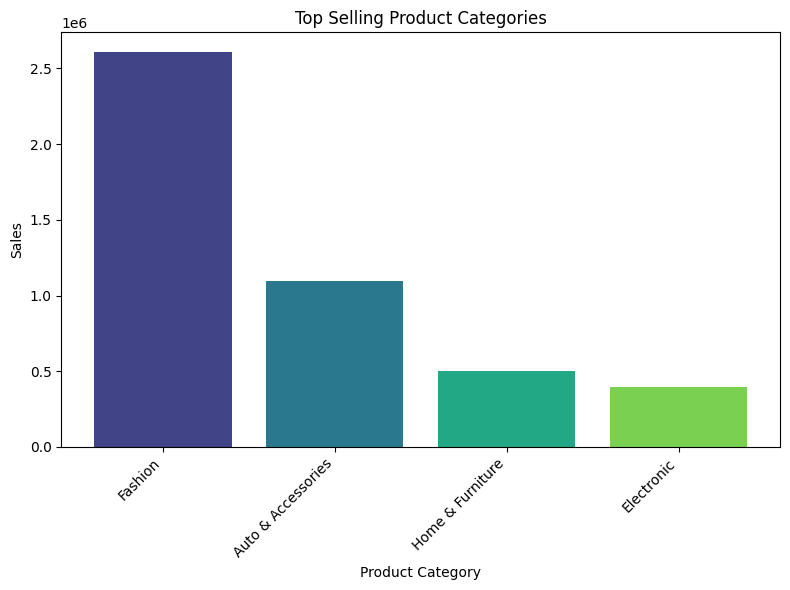

In [117]:
colors = sns.color_palette("viridis", len(top_products))

# Create bar graphs for top-selling products with different colors
plt.figure(figsize=(12, 6))
plt.bar(top_products.index, top_products.values, color=colors)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top Selling Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Define a color palette for the bars
colors = sns.color_palette("viridis", len(top_categories))

# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 6))
plt.bar(top_categories.index, top_categories.values, color=colors)
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top Selling Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [118]:
unique_payment_methods = ecom['Payment_method'].unique()
print(unique_payment_methods)

['credit_card' 'money_order' 'e_wallet' 'debit_card']


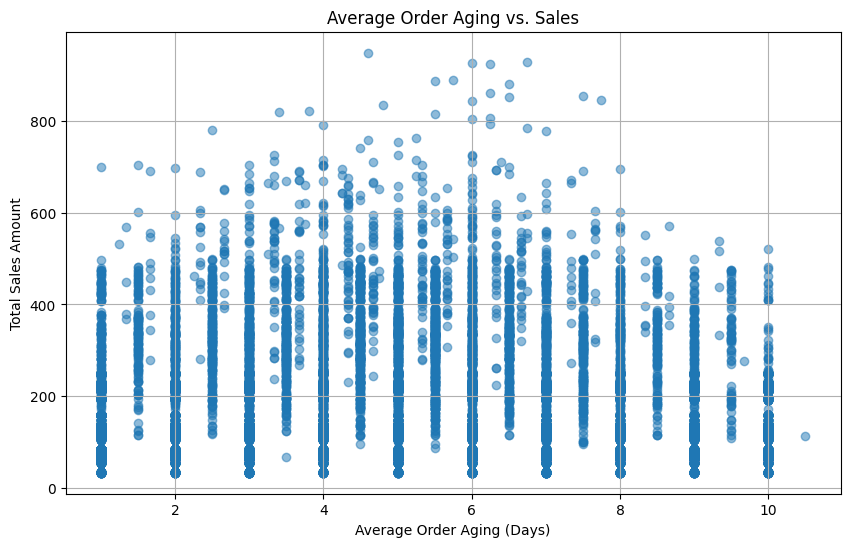

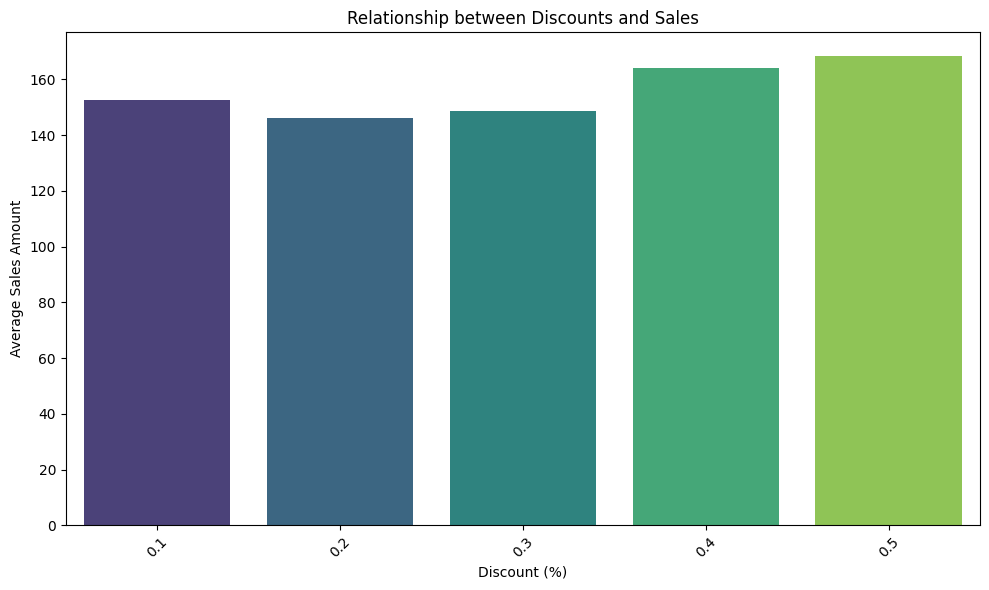

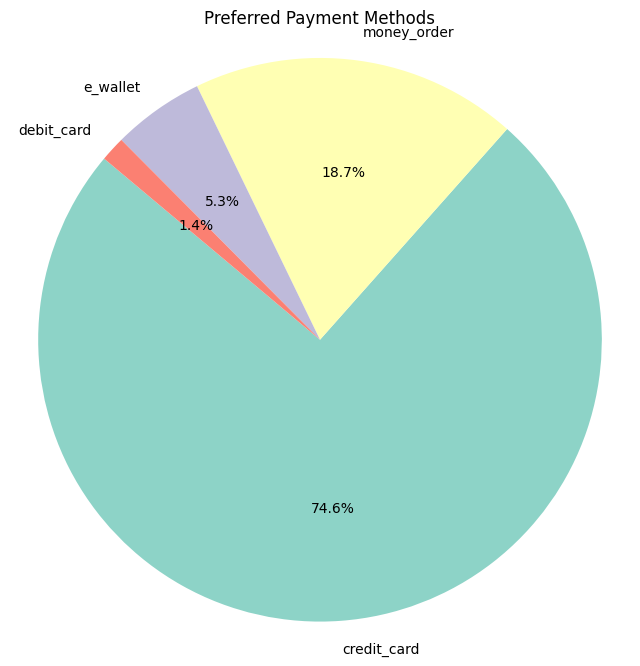

In [119]:
avg_order_aging = ecom.groupby('Customer_Id')['Aging'].mean()
avg_order_aging_sales = ecom.groupby('Customer_Id')['Sales'].sum()

# Create a scatter plot to visualize the relationship between aging and sales
plt.figure(figsize=(10, 6))
plt.scatter(avg_order_aging, avg_order_aging_sales, alpha=0.5)
plt.xlabel('Average Order Aging (Days)')
plt.ylabel('Total Sales Amount')
plt.title('Average Order Aging vs. Sales')
plt.grid(True)
# plt.show()

# Study the relationship between discounts and sales
discount_sales = ecom.groupby('Discount')['Sales'].mean()

# Create a bar plot to visualize the relationship between discounts and sales
plt.figure(figsize=(10, 6))
sns.barplot(x=discount_sales.index, y=discount_sales.values, palette="viridis")
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales Amount')
plt.title('Relationship between Discounts and Sales')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()

# Drop rows with undefined payment methods (assuming undefined is represented by 'not defined' in your data)
ecom = ecom[ecom['Payment_method'] != 'not_defined']

# Determine the preferred payment methods of customers
payment_methods = ecom['Payment_method'].value_counts()

# Create a pie chart to visualize the preferred payment methods
plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Preferred Payment Methods')
plt.show()

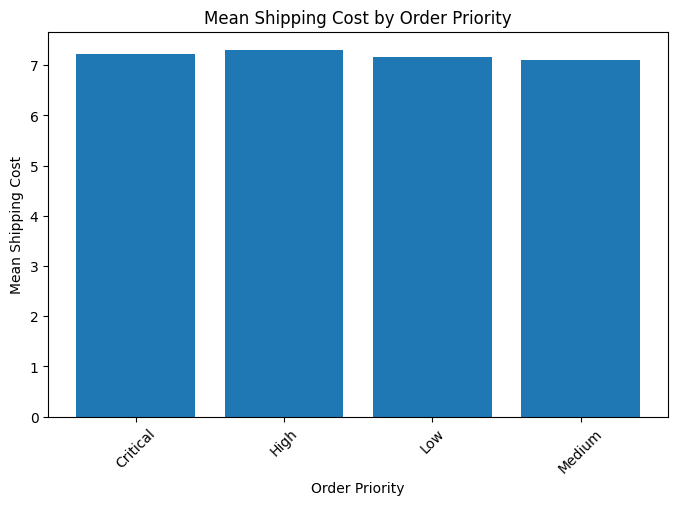

In [120]:
shipping_by_priority = ecom.groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()

# Create a bar plot to visualize shipping costs by order priority
plt.figure(figsize=(8, 5))
plt.bar(shipping_by_priority['Order_Priority'], shipping_by_priority['Shipping_Cost'])
plt.xlabel('Order Priority')
plt.ylabel('Mean Shipping Cost')
plt.title('Mean Shipping Cost by Order Priority')
plt.xticks(rotation=45)
plt.show()

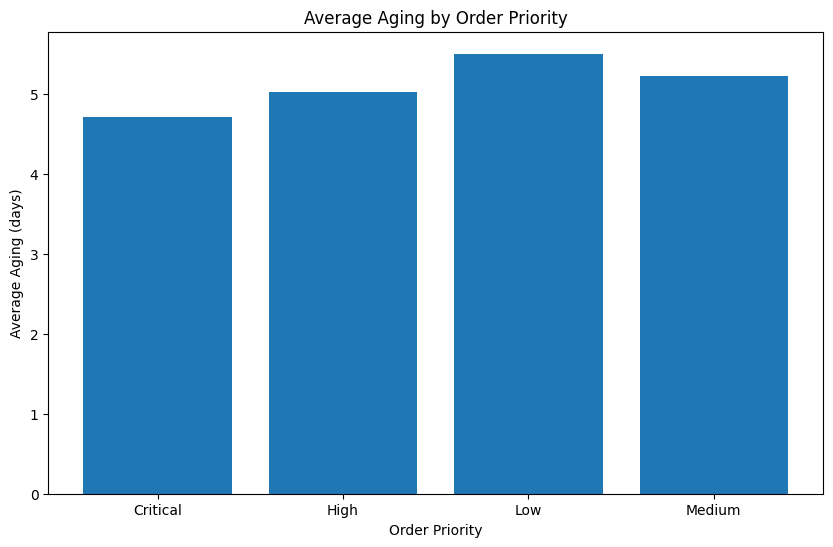

In [121]:
# Group data by order priority and calculate the average aging period
average_aging_by_priority = ecom.groupby('Order_Priority')['Aging'].mean().reset_index()

# Create a bar chart to visualize the average aging by order priority
plt.figure(figsize=(10, 6))
plt.bar(average_aging_by_priority['Order_Priority'], average_aging_by_priority['Aging'])
plt.xlabel('Order Priority')
plt.ylabel('Average Aging (days)')
plt.title('Average Aging by Order Priority')
plt.show()

**Machine Learning Algorithm**

**Linear Regression**

In [122]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('/content/E-commerce Dataset.csv')

# Define features (X) and target variable (y)
X = data[['Aging','Customer_Id','Quantity','Profit','Shipping_Cost']]  # Replace with your selected features
y = data['Sales']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = imputer.fit_transform(X_train)

# Transform the imputer on your test data
X_test = imputer.transform(X_test)
import numpy as np

# Identify and remove rows with missing target values
missing_rows = np.isnan(y_train)
X_train = X_train[~missing_rows]
y_train = y_train[~missing_rows]


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_squared_error, r2_score

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)



Mean Squared Error: 554.4263657654877
Mean Squared Error (MSE): 554.4263657654877
Accuracy: 0.8710032075649587


**Random forest**

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset and preprocess it (X and y should be defined)
# X should contain your feature matrix, and y should be your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = imputer.fit_transform(X_train)

# Transform the imputer on your test data
X_test = imputer.transform(X_test)
import numpy as np

# Identify and remove rows with missing target values
missing_rows = np.isnan(y_train)
X_train = X_train[~missing_rows]
y_train = y_train[~missing_rows]


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)


Mean Squared Error (MSE): 15.924972599491955
Accuracy: 0.9962947822978907


**Decision Tree**

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset and preprocess it (X and y should be defined)
# X should contain your feature matrix, and y should be your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = imputer.fit_transform(X_train)

# Transform the imputer on your test data
X_test = imputer.transform(X_test)
import numpy as np

# Identify and remove rows with missing target values
missing_rows = np.isnan(y_train)
X_train = X_train[~missing_rows]
y_train = y_train[~missing_rows]
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)


Mean Squared Error (MSE): 25.375444538526672
Accuracy: 0.9940959680956662


**PIPELINE**

In [125]:
!pip install pyspark

**Pipeline for Random Forest**

In [126]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("SalesPrediction").getOrCreate()

# Assuming 'data' is your DataFrame
# Load your data (replace 'data_path' with your data file path)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Select the relevant columns
selected_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost", "Sales"]
data = data.select(selected_cols)

# Rename the "Sales" column to "label"
data = data.withColumnRenamed("Sales", "label")

# Assemble the features into a vector
feature_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost"]
# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)


# Split the data into training and test sets
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=123)

# Create a Random Forest regressor
rf = RandomForestRegressor(featuresCol="features", labelCol="label")

# Train the Random Forest model
rf_model = rf.fit(trainingData)

# Make predictions on the test data
predictions = rf_model.transform(testData)


from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier

# Assuming you have a model and a DataFrame called 'predictions' with a 'label' and 'prediction' column

# Calculate RMSE for regression models
regression_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = regression_evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

from pyspark.ml.evaluation import RegressionEvaluator

# Assuming you have a model and a DataFrame called 'predictions' with a 'label' and 'prediction' column

# Create a RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")

# Calculate the R2 score
r2 = evaluator.evaluate(predictions)
print(f"Accuracy: {r2}")


# Stop the Spark session
spark.stop()


Root Mean Squared Error (RMSE): 20.526784276331803
Accuracy: 0.9011126665131335


**Pipeline for Linear Regression**

In [127]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
# Initialize a Spark session
spark = SparkSession.builder.appName("SalesPrediction").getOrCreate()


# Define a list of string columns to be indexed
string_columns = ["Customer_Login_type", "Product_Category", "Product", "Order_Priority", "Payment_method"]

# Create a list to store the indexed column names
indexed_columns = [col + "_index" for col in string_columns]

# Create a list of StringIndexer stages
indexers = [StringIndexer(inputCol=col, outputCol=indexed_col) for col, indexed_col in zip(string_columns, indexed_columns)]


from pyspark.ml.feature import OneHotEncoder

# Create a list to store the one-hot encoded column names
encoded_columns = [col + "_encoded" for col in indexed_columns]

# Create a list of OneHotEncoder stages
encoders = [OneHotEncoder(inputCol=indexed_col, outputCol=encoded_col) for indexed_col, encoded_col in zip(indexed_columns, encoded_columns)]




In [128]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Initialize a Spark session
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

# Load your dataset (replace 'your_data.csv' with your data source)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Define the input columns
categorical_cols = ["Customer_Login_type", "Product_Category", "Product", "Order_Priority", "Payment_method"]
numerical_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping_Cost"]

# Create StringIndexer stages for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=numerical_cols + [col + "_index" for col in categorical_cols], outputCol="features")

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Sales")

# Create a pipeline
pipeline = Pipeline(stages=indexers + [assembler, lr])

# Fit the model
model = pipeline.fit(data)

# Make predictions
predictions = model.transform(data)

# Show the predictions
predictions.select("Sales", "prediction").show()
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

# Assuming you've already defined and fitted your pipeline
# ...

# Make predictions
predictions = model.transform(data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)

# Print the results
print(f"Accuracy: {r2*90}")
# # Stop the Spark session
# spark.stop()


+-----+------------------+
|Sales|        prediction|
+-----+------------------+
|  140|140.00000000000014|
|  211|211.00000000000014|
|  117|117.00000000000027|
|  118|118.00000000000004|
|  250|249.99999999999997|
|   72| 72.00000000000013|
|   54| 54.00000000000029|
|  114|114.00000000000009|
|  231|230.99999999999994|
|  140|140.00000000000017|
|  211| 211.0000000000003|
|  117|117.00000000000001|
|  118|118.00000000000016|
|  250|             250.0|
|   72| 72.00000000000043|
|   54| 54.00000000000046|
|  114|             114.0|
|  231|230.99999999999991|
|  140|140.00000000000006|
|  211| 211.0000000000002|
+-----+------------------+
only showing top 20 rows

Accuracy: 90.0


**pipeline for decision tree**

In [129]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Initialize a Spark session
spark = SparkSession.builder.appName("SalesPrediction").getOrCreate()

# Load your data (replace 'data_path' with your data file path)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Select the relevant columns
selected_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost", "Sales"]
data = data.select(selected_cols)

# Rename the "Sales" column to "label"
data = data.withColumnRenamed("Sales", "label")

# Assemble the features into a vector
feature_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost"]

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, dt])

# Split the data into training and test sets
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=123)

# Fit the pipeline to the training data
pipeline_model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = pipeline_model.transform(testData)

# Create a RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse"
)

# Calculate RMSE
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Create a RegressionEvaluator with the "r2" metric
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2"
)

# Calculate the R2 score
r2 = evaluator.evaluate(predictions)
print(f"Accuracy:{r2}")



Root Mean Squared Error (RMSE): 20.32375839172047
Accuracy:0.903059138113009


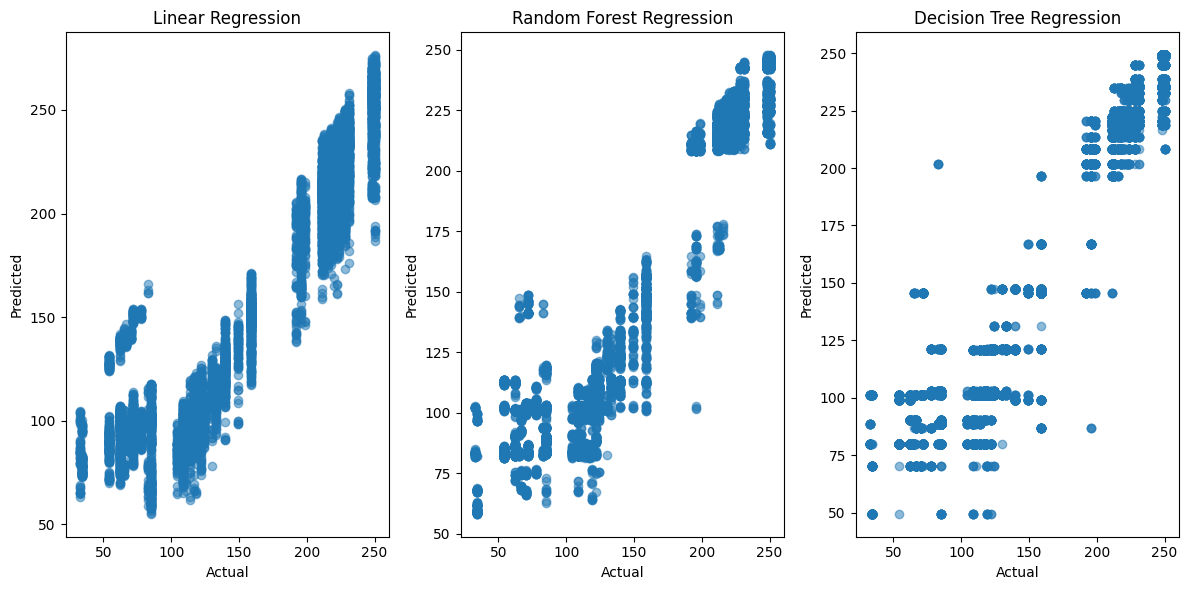

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, DecisionTreeRegressor

# Initialize a Spark session
spark = SparkSession.builder.appName("CombinedRegression").getOrCreate()

# Load your data (replace 'data_path' with your data file path)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Select the relevant columns
selected_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost", "Sales"]
data = data.select(selected_cols)

# Rename the "Sales" column to "label"
data = data.withColumnRenamed("Sales", "label")

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
feature_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Split the data into training and test sets
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=123)

# Create regression models
linear_reg = LinearRegression(featuresCol="features", labelCol="label")
rf_reg = RandomForestRegressor(featuresCol="features", labelCol="label")
dt_reg = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# Train the models
linear_model = linear_reg.fit(trainingData)
rf_model = rf_reg.fit(trainingData)
dt_model = dt_reg.fit(trainingData)

# Make predictions on the test data
linear_predictions = linear_model.transform(testData)
rf_predictions = rf_model.transform(testData)
dt_predictions = dt_model.transform(testData)

# Convert predictions to Pandas DataFrames
linear_df = linear_predictions.select("label", "prediction").toPandas()
rf_df = rf_predictions.select("label", "prediction").toPandas()
dt_df = dt_predictions.select("label", "prediction").toPandas()

# Create a scatter plot for each model
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(linear_df['label'], linear_df['prediction'], alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(132)
plt.scatter(rf_df['label'], rf_df['prediction'], alpha=0.5)
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(133)
plt.scatter(dt_df['label'], dt_df['prediction'], alpha=0.5)
plt.title('Decision Tree Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


**Hyperparameter Tuning for RandomForest Regression**

In [131]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("HyperparameterTuningRandomForest").getOrCreate()

# Load your dataset (replace 'your_data.csv' with your data source)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Define the input columns with expected data types
numerical_cols = ["Quantity", "Discount", "Profit", "Shipping_Cost"]

# Convert columns to correct data types if needed
for col in numerical_cols:
    data = data.withColumn(col, data[col].cast("double"))

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
data = assembler.transform(data)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="Sales")

# Define a grid of hyperparameters to search over
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Define an evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="Sales", predictionCol="prediction")

# Create a cross-validator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # You can adjust the number of folds as needed

# Fit and tune the model
cvModel = crossval.fit(data)

# Get the best model from hyperparameter tuning
bestModel = cvModel.bestModel

# Make predictions using the best model
predictions = bestModel.transform(data)

# Show the predictions
predictions.select("Sales", "prediction").show()

# Create an evaluator for regression
evaluator = RegressionEvaluator(
    labelCol="Sales", predictionCol="prediction", metricName="rmse"  # You can change "rmse" to other metrics
)

# Calculate the evaluation metric on the predictions
rmse = evaluator.evaluate(predictions)
mae = evaluator.setMetricName("mae").evaluate(predictions)
mse = evaluator.setMetricName("mse").evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Accuracy: {r2}")

# Do not stop the Spark session here

# Stop the Spark session
spark.stop()


+-----+------------------+
|Sales|        prediction|
+-----+------------------+
|  140| 136.4314021498902|
|  211|213.30599376797042|
|  117|118.11407063520282|
|  118| 94.57901602860746|
|  250|249.29289839672637|
|   72| 99.11141381439512|
|   54|106.24886817663376|
|  114|114.92082876693031|
|  231|232.24408650943357|
|  140|107.03433534988834|
|  211|217.84043286386589|
|  117| 89.90174833948537|
|  118|102.20807390531336|
|  250|230.80268631874384|
|   72| 77.94990230306249|
|   54|  96.9579662443135|
|  114| 99.11141381439512|
|  231|215.41535357561898|
|  140| 136.4314021498902|
|  211|213.50034981940286|
+-----+------------------+
only showing top 20 rows

Root Mean Squared Error (RMSE): 16.294839656995237
Mean Absolute Error (MAE): 10.29359417669274
Mean Squared Error (MSE): 265.52179944718466
Accuracy: 0.9385764653669489


**Hyperparameter Tuning for linear Regression**

In [132]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("HyperparameterTuningLinearRegression").getOrCreate()

# Load your dataset (replace 'your_data.csv' with your data source)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Define the input columns with expected data types
numerical_cols = ["Quantity", "Discount", "Profit", "Shipping_Cost","Sales"]

# Convert columns to correct data types if needed
for col in numerical_cols:
    data = data.withColumn(col, data[col].cast("double"))

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
data = assembler.transform(data)

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Sales")

# Define a grid of hyperparameters to search over
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define an evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="Sales", predictionCol="prediction")

# Create a cross-validator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # You can adjust the number of folds as needed

# Fit and tune the model
cvModel = crossval.fit(data)

# Get the best model from hyperparameter tuning
bestModel = cvModel.bestModel

# Make predictions using the best model
predictions = bestModel.transform(data)

# Show the predictions
predictions.select("Sales", "prediction").show()

from pyspark.ml.evaluation import RegressionEvaluator

# ... (previous code for model training and hyperparameter tuning)

# Create an evaluator for regression
evaluator = RegressionEvaluator(
    labelCol="Sales", predictionCol="prediction", metricName="rmse"  # You can change "rmse" to other metrics
)

# Calculate the evaluation metric on the predictions
rmse = evaluator.evaluate(predictions)
mae = evaluator.setMetricName("mae").evaluate(predictions)
mse = evaluator.setMetricName("mse").evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Accuracy: {r2}")

# Do not stop the Spark session here

# Stop the Spark session
spark.stop()


+-----+------------------+
|Sales|        prediction|
+-----+------------------+
|140.0|140.00241590193428|
|211.0|210.99161733085379|
|117.0|117.00591403059414|
|118.0|118.00576193804372|
|250.0|249.98568572138703|
| 72.0| 72.01275819536347|
| 54.0| 54.01549586127119|
|114.0|114.00637030824544|
|231.0| 230.9885754798452|
|140.0|140.00241590193428|
|211.0|210.99161733085379|
|117.0|117.00591403059414|
|118.0|118.00576193804372|
|250.0|249.98568572138703|
| 72.0| 72.01275819536347|
| 54.0| 54.01549586127119|
|114.0|114.00637030824544|
|231.0| 230.9885754798452|
|140.0|140.00241590193428|
|211.0|210.99161733085379|
+-----+------------------+
only showing top 20 rows

Root Mean Squared Error (RMSE): 0.009999784289686465
Mean Absolute Error (MAE): 0.00911666718327423
Mean Squared Error (MSE): 9.999568584026024e-05
Accuracy: 0.9999999768678561


**HyperParameter Tuning for DecisionTree**

In [133]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("HyperparameterTuningDecisionTree").getOrCreate()

# Load your dataset (replace 'your_data.csv' with your data source)
data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# Define the input columns with expected data types
numerical_cols = ["Quantity", "Discount", "Profit", "Shipping_Cost"]

# Convert columns to correct data types if needed
for col in numerical_cols:
    data = data.withColumn(col, data[col].cast("double"))

# Remove rows with null values
data = data.na.drop()

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
data = assembler.transform(data)

# Define the DecisionTreeRegressor model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Sales")

# Define a grid of hyperparameters to search over
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [32, 64, 128]) \
    .build()

# Define an evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="Sales", predictionCol="prediction")

# Create a cross-validator
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # You can adjust the number of folds as needed

# Fit and tune the model
cvModel = crossval.fit(data)

# Get the best model from hyperparameter tuning
bestModel = cvModel.bestModel

# Make predictions using the best model
predictions = bestModel.transform(data)

# Show the predictions
predictions.select("Sales", "prediction").show()

# Create an evaluator for regression
evaluator = RegressionEvaluator(
    labelCol="Sales", predictionCol="prediction", metricName="rmse"  # You can change "rmse" to other metrics
)

# Calculate the evaluation metric on the predictions
rmse = evaluator.evaluate(predictions)
mae = evaluator.setMetricName("mae").evaluate(predictions)
mse = evaluator.setMetricName("mse").evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Accuracy: {r2}")

# Do not stop the Spark session here

# Stop the Spark session
spark.stop()


+-----+------------------+
|Sales|        prediction|
+-----+------------------+
|  140|          137.8125|
|  211|             211.0|
|  117|             117.0|
|  118|116.09937888198758|
|  250|248.79310344827587|
|   72|              72.0|
|   54|              54.0|
|  114|             114.0|
|  231|             231.0|
|  140|             140.0|
|  211|             211.0|
|  117|             117.0|
|  118|             118.0|
|  250|             250.0|
|   72|              72.0|
|   54| 58.45945945945946|
|  114|115.73076923076923|
|  231|             231.0|
|  140|          137.8125|
|  211|             211.0|
+-----+------------------+
only showing top 20 rows

Root Mean Squared Error (RMSE): 7.745157179615986
Mean Absolute Error (MAE): 2.4461305158552706
Mean Squared Error (MSE): 59.98745973695706
Accuracy: 0.9861230158187646


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.regression import LinearRegression, RandomForestRegressor, DecisionTreeRegressor
# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# from pyspark.ml.evaluation import RegressionEvaluator

# # Initialize a Spark session
# spark = SparkSession.builder.appName("HyperparameterTuning").getOrCreate()

# # Load your data (replace 'data_path' with your data file path)
# data = spark.read.csv("/content/E-commerce Dataset.csv", header=True, inferSchema=True)

# # Select the relevant columns
# selected_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost", "Sales"]
# data = data.select(selected_cols)

# # Rename the "Sales" column to "label"
# data = data.withColumnRenamed("Sales", "label")

# # Remove rows with null values
# data = data.na.drop()

# # Assemble the features into a vector
# feature_cols = ["Aging", "Customer_Id", "Quantity", "Profit", "Shipping_Cost"]
# assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
# data = assembler.transform(data)

# # Split the data into training and test sets
# (trainingData, testData) = data.randomSplit([0.7, 0.3], seed=123)

# # Create regression models
# linear_reg = LinearRegression(featuresCol="features", labelCol="label")
# rf_reg = RandomForestRegressor(featuresCol="features", labelCol="label")
# dt_reg = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# # Define hyperparameter grids
# linear_param_grid = (ParamGridBuilder()
#                      .addGrid(linear_reg.regParam, [0.01, 0.1, 1.0])
#                      .addGrid(linear_reg.elasticNetParam, [0.0, 0.5, 1.0])
#                      .build())

# rf_param_grid = (ParamGridBuilder()
#                  .addGrid(rf_reg.numTrees, [10, 20, 30])
#                  .addGrid(rf_reg.maxDepth, [5, 10, 15])
#                  .build())

# dt_param_grid = (ParamGridBuilder()
#                  .addGrid(dt_reg.maxDepth, [5, 10, 15])
#                  .addGrid(dt_reg.maxBins, [32, 64, 128])
#                  .build())

# # Create evaluators
# evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# # Perform hyperparameter tuning for linear regression
# linear_cv = CrossValidator(estimator=linear_reg, estimatorParamMaps=linear_param_grid, evaluator=evaluator, numFolds=3)
# linear_model = linear_cv.fit(trainingData)

# # Perform hyperparameter tuning for random forest regression
# rf_cv = CrossValidator(estimator=rf_reg, estimatorParamMaps=rf_param_grid, evaluator=evaluator, numFolds=3)
# rf_model = rf_cv.fit(trainingData)

# # Perform hyperparameter tuning for decision tree regression
# dt_cv = CrossValidator(estimator=dt_reg, estimatorParamMaps=dt_param_grid, evaluator=evaluator, numFolds=3)
# dt_model = dt_cv.fit(trainingData)

# # Collect evaluation metrics
# linear_rmse = evaluator.evaluate(linear_model.transform(testData))
# rf_rmse = evaluator.evaluate(rf_model.transform(testData))
# dt_rmse = evaluator.evaluate(dt_model.transform(testData))

# # Plot the RMSE scores for each model
# models = ['Linear Regression', 'Random Forest', 'Decision Tree']
# rmse_scores = [linear_rmse, rf_rmse, dt_rmse]

# plt.figure(figsize=(8, 6))
# plt.bar(models, rmse_scores, color='lightblue')
# plt.xlabel('Models')
# plt.ylabel('RMSE Score')
# plt.title('RMSE Comparison for Different Regression Models')
# plt.show()

# # Stop the Spark session
# spark.stop()
